# Sparx Foundation


- By Siddharth Shankar Das

# Computer Vision & Internet of Things - 
* **Task 2 - Color Identification in Images**

In [36]:
import os
import cv2
import numpy as np
from skimage.color import rgb2lab, deltaE_cie76
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans

import urllib
import cv2

# Showing the Image

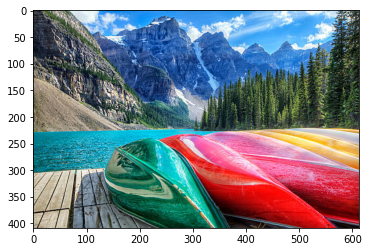

In [37]:
import urllib.request

req = urllib.request.urlopen('https://media.istockphoto.com/id/166041214/photo/cayaks-on-the-moraine-lake.jpg?s=612x612&w=0&k=20&c=zSS-OgqEFnafrbfMHeFSn-KiAqJJTW-kgXZzf1yn8oA=')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.show('random_title', img)
plt.imshow(img)
plt.show()

# Observing the Gray-Scaled Image

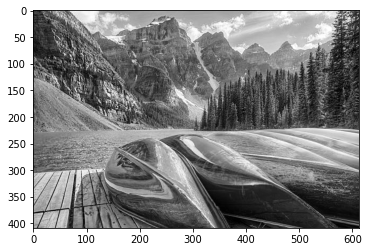

In [38]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

# Re-Scaling our Image

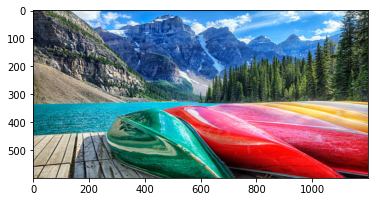

In [39]:
resized_image = cv2.resize(img, (1200, 600))
plt.imshow(resized_image)
plt.show()

# Color Identificaiton

In [40]:
# Defininig a Hex Value
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [41]:
def get_image(image_path):
    req = urllib.request.urlopen(image_path)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1) # 'Load it as it is'
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Using KMeans Algorithm

In [42]:
def get_colors(image, number_of_colors, show_chart): 
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    freq = Counter(labels)
    freq = dict(sorted(freq.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in freq.keys()]
    
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in freq.keys()]
    rgb_colors = [ordered_colors[i] for i in freq.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(freq.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([204.25508425,  25.95605092,  29.7190851 ]),
 array([ 64.20733963, 172.30721308, 227.49745287]),
 array([55.8456885 , 88.59239965, 78.03370463]),
 array([235.04876688, 124.40386118, 135.8633523 ]),
 array([135.64179813, 141.40383376, 129.86737913]),
 array([30.31595698, 39.65597564, 35.16829456]),
 array([ 35.94039872, 105.75117053, 156.55257811]),
 array([209.78950958, 207.20678792, 209.65167262])]

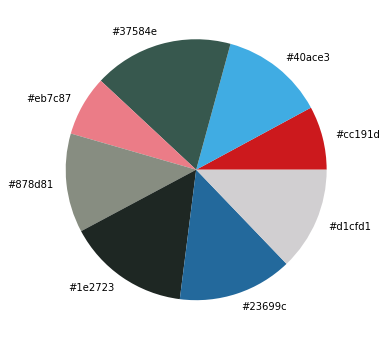

In [43]:
get_colors(get_image('https://media.istockphoto.com/id/166041214/photo/cayaks-on-the-moraine-lake.jpg?s=612x612&w=0&k=20&c=zSS-OgqEFnafrbfMHeFSn-KiAqJJTW-kgXZzf1yn8oA='), 8, True)

# Final: Identifying the Colors from the images

In [44]:
def showImg(image_path):
  req = urllib.request.urlopen(image_path)
  arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
  img = cv2.imdecode(arr, -1) # 'Load it as it is'
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.show('SSD_title', img)
  plt.imshow(img)
  plt.show()

In [45]:
img_path="https://images6.fanpop.com/image/photos/36500000/Beautiful-Landscapes-image-beautiful-landscapes-36505099-599-479.jpg"

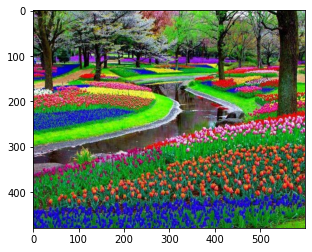

In [46]:
showImg(img_path)

[array([ 28.55166751, 129.201164  ,  42.53024705]),
 array([182.61991383,  71.19582735,  66.4802936 ]),
 array([ 34.76232862,  42.49086691, 157.2626872 ]),
 array([79.4787166 , 87.29662534, 66.29276918]),
 array([122.29652359, 136.24487494, 113.43471771]),
 array([36.15380678, 41.84473448, 26.54418426]),
 array([ 97.81623347, 211.50172627,  29.63057781]),
 array([199.0013109 , 172.83815818, 161.51272668])]

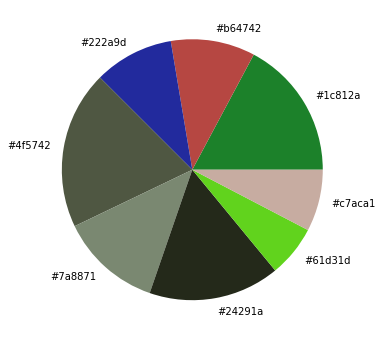

In [47]:
get_colors(get_image(img_path), 8, True)

In [51]:
img_path="https://i.ytimg.com/vi/MPIfPi3YC4E/maxresdefault.jpg"

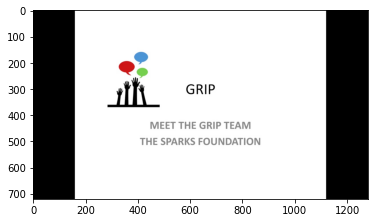

In [52]:
showImg(img_path)

[array([254.8688852 , 254.87238144, 254.86526161]),
 array([0.10004224, 0.10004224, 0.10004224]),
 array([143.2087436 , 142.13194171, 142.15872391]),
 array([200.57455268, 201.12524851, 199.93836978]),
 array([203.69793621,  25.09005629,  25.95309568]),
 array([ 79.90214797, 149.77088305, 212.42243437]),
 array([120.08301887, 207.12830189,  81.56603774]),
 array([77.50707547, 77.50235849, 77.50707547])]

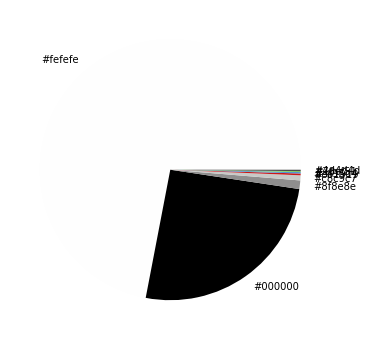

In [53]:
get_colors(get_image(img_path), 8, True)

# T